# Goal: Determine whether Ethiopia's beta distributions are causing us to get negative averted results

First, I need to take care of an annoying Python issue so that I don't have to keep copying code...


## 1. Add the `vivarium_data_analysis` directory to the Python path `sys.path` so that I can import modules from other folders in the vivarium data analysis repo

See these posts:

1. https://stackoverflow.com/questions/32152978/importing-modules-from-multiple-parallel-subdirectories-python/32153241
2. https://stackoverflow.com/questions/9153527/import-module-in-another-directory-from-a-parallel-sub-directory
3. https://gist.github.com/JungeAlexander/6ce0a5213f3af56d7369
3. http://python-notes.curiousefficiency.org/en/latest/python_concepts/import_traps.html
4. https://docs.python.org/3/tutorial/modules.html

Note that the solution below makes any modules in the current dirctory accessible in two different ways -- e.g. `import lsff_plots` and `import plots_and_other_misc.lsff_plots` should both work. According to the "import traps" link above, this should be avoided (perhaps one workaround would be to remove `''` from `sys.path`, forcing all local imports to specify the subfolder of `vivarium_data_analysis`?).

A better solution would be to make `vivarium_data_analysis` into an actual package that can be `pip install`ed, but I don't know how to do that - we should get help from the SWE's.

In [1]:
import sys
import os.path
!whoami
!date

ndbs
Thu Jul  2 14:40:42 PDT 2020


In [2]:
sys.path

['/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python36.zip',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/lib-dynload',
 '',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/site-packages',
 '/ihme/homes/ndbs/vivarium_conic_lsff/src',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/site-packages/IPython/extensions',
 '/ihme/homes/ndbs/.ipython']

In [3]:
# current directory
!pwd

/ihme/homes/ndbs/vivarium_data_analysis/plots_and_other_misc


In [4]:
# I want to import the prob_utils module from the probability directory
!ls ../probability/

2020_03_23a_coverage_distributions.ipynb  prob_utils.py
coverage_india_nigeria.svg		  __pycache__


In [5]:
# # But the following import fails with:
# # ModuleNotFoundError: No module named 'probability'

# from probability import prob_utils

# # The solution is to add the `vivarium_data_analysis` directory to `sys.path`

In [6]:
# Get the absolute path of the current parent directory
os.path.abspath("..")

'/ihme/homes/ndbs/vivarium_data_analysis'

In [7]:
# Add the parent directory to sys.path so we can access subfolders
sys.path.append(os.path.abspath(".."))
sys.path

['/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python36.zip',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/lib-dynload',
 '',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/site-packages',
 '/ihme/homes/ndbs/vivarium_conic_lsff/src',
 '/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/site-packages/IPython/extensions',
 '/ihme/homes/ndbs/.ipython',
 '/ihme/homes/ndbs/vivarium_data_analysis']

In [8]:
# Now we can import the prob_utils module from the file
# /ihme/homes/ndbs/vivarium_data_analysis/probability/prob_utils.py'
# using the import statement that previously failed:
from probability import prob_utils

### Summary of above steps to get this to work

Note: If the directory structure changes, ".." would have to be replaced with the appropriate directory

In [9]:
# import sys
# import os.path

# sys.path.append(os.path.abspath(".."))
# from probability import prob_utils

## 2. Do other imports and set up auto-reloading of modules so I can edit the `.py` files as I work

In [10]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy import stats
from plots_and_other_misc import lsff_plots

In [11]:
%load_ext autoreload
%autoreload 2

## 3. Import the coverage data

In [12]:
flour_df, oil_df = lsff_plots.get_coverage_dfs()
flour_df.T

eats_fortified                 eats_fortifiable          \
                            mean   lower   upper             mean   lower   
Ethiopia                   1.000   0.000  10.000             15.0  10.000   
India (Rajasthan)          6.300   4.800   7.900              7.1   5.600   
Nigeria (Kano)            22.700  20.000  25.500             83.8  81.400   
Nigeria (Lagos)            5.400   3.800   6.900             13.8  11.500   
India                      6.300   4.800   7.900              7.1   5.600   
Nigeria                    8.168   6.392   9.876             25.0  22.684   

                          eats_vehicle                  
                    upper         mean   lower   upper  
Ethiopia           20.000       28.000  23.000  33.000  
India (Rajasthan)   9.100       83.200  79.500  86.500  
Nigeria (Kano)     86.200       83.900  81.500  86.300  
Nigeria (Lagos)    16.100       14.200  11.800  16.500  
India               9.100       83.200  79.500  86.500  
Nigeria            27.316       25.352  22.952  27.668

In [13]:
oil_df.T

eats_fortified                eats_fortifiable          \
                            mean   lower  upper             mean   lower   
Ethiopia                   1.000   0.000  10.00           44.000  34.000   
India (Rajasthan)         24.300  21.100  27.90           89.400  87.000   
Nigeria (Kano)             7.600   5.900   9.40           35.900  32.700   
Nigeria (Lagos)            7.200   5.500   8.90           22.700  19.900   
India                     24.300  21.100  27.90           89.400  87.000   
Nigeria                    7.264   5.564   8.98           24.812  21.948   

                          eats_vehicle                  
                    upper         mean    lower  upper  
Ethiopia           54.000       55.000   45.000   65.0  
India (Rajasthan)  91.800      100.000  100.000  100.0  
Nigeria (Kano)     39.100       98.400   97.600   99.3  
Nigeria (Lagos)    25.500       98.600   97.800   99.3  
India              91.800      100.000  100.000  100.0  
Nigeria            27.676       98.568   97.768   99.3

## 4. Plot the density and distribution of Ethiopia's oil coverage parameter $a$

The distribution for the 

In [14]:
ethiopia_a_dist = stats.beta(0.1,9.9)

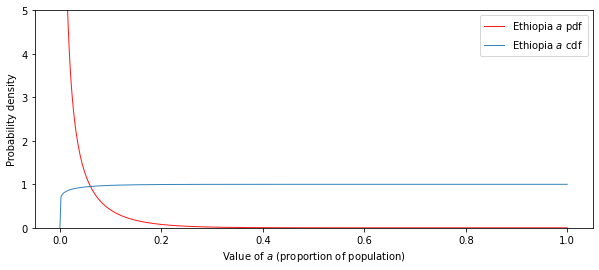

In [16]:
fig, ax = plt.subplots(figsize = (10,4))

x = np.linspace(0,1, 500)
ax.plot(x, ethiopia_a_dist.pdf(x), 'r-', lw=1, alpha=0.9, label=r'Ethiopia $a$ pdf')
ax.plot(x, ethiopia_a_dist.cdf(x), lw=1, alpha=0.9, label=r'Ethiopia $a$ cdf')

ax.set_ylim(0,5)
ax.legend()
ax.set_xlabel(r'Value of $a$ (proportion of population)')
ax.set_ylabel('Probability density')

plt.show()

In [27]:
# Show the 95% confidence interval for a:
ethiopia_a_dist.interval(0.95)

(6.125969082943768e-18, 0.09822655608111423)

In [29]:
# See how likely it is that a>.44 (the lower endpoint for b for oil)
ethiopia_a_dist.sf(0.44)

8.154535365834104e-05

In [32]:
# See how likely it is that a>b_lower, a>b_mean, and a>b_upper for flour
ethiopia_a_dist.sf([0.10, 0.15, 0.20])

array([0.02426191, 0.0107513 , 0.00488836])

## 5. Plot densities and distribution functions for all 3 Ethiopia parameters

In [31]:
oil_df

Ethiopia  India (Rajasthan)  Nigeria (Kano)  \
eats_fortified   mean          1               24.3             7.6   
                 lower         0               21.1             5.9   
                 upper        10               27.9             9.4   
eats_fortifiable mean         44               89.4            35.9   
                 lower        34               87.0            32.7   
                 upper        54               91.8            39.1   
eats_vehicle     mean         55              100.0            98.4   
                 lower        45              100.0            97.6   
                 upper        65              100.0            99.3   

                        Nigeria (Lagos)  India  Nigeria  
eats_fortified   mean               7.2   24.3    7.264  
                 lower              5.5   21.1    5.564  
                 upper              8.9   27.9    8.980  
eats_fortifiable mean              22.7   89.4   24.812  
                 lower             19.9   87.0   21.948  
                 upper             25.5   91.8   27.676  
eats_vehicle     mean              98.6  100.0   98.568  
                 lower             97.8  100.0   97.768  
                 upper             99.3  100.0   99.300

In [32]:
idx = pd.IndexSlice
oil_df.loc[idx['eats_fortifiable', :], 'Ethiopia']

eats_fortifiable  mean     44
                  lower    34
                  upper    54
Name: Ethiopia, dtype: int64

In [33]:
mean = oil_df.loc[('eats_fortifiable', 'mean'), 'Ethiopia'] / 100
upper = oil_df.loc[('eats_fortifiable', 'upper'), 'Ethiopia'] / 100
print(mean, upper)

0.44 0.54


In [34]:
ethiopia_b_dist = prob_utils.beta_from_mean_approx_quantile(mean, upper, 0.975)

In [73]:
fortified_alpha = 0.1
fortified_beta = 9.9
coverage_df = flour_df

eats_fortified (0.1, 9.9)
eats_fortifiable (29.237159978310032, 165.6772398770902)
eats_vehicle (86.45706700421684, 222.31817229655755)


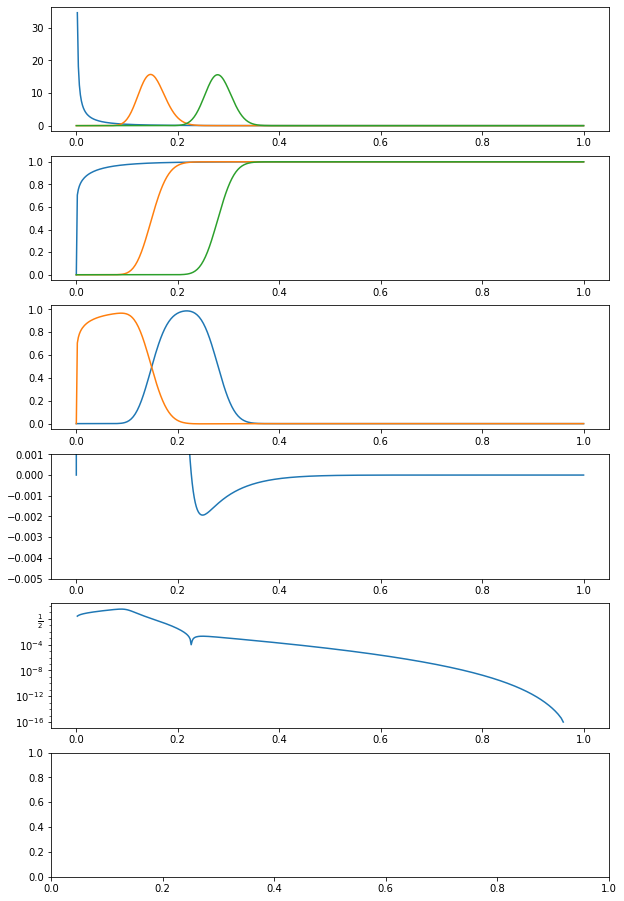

In [88]:
coverage_levels = ['eats_fortified', 'eats_fortifiable', 'eats_vehicle']
distributions = [stats.beta(fortified_alpha,fortified_beta)]
dist_params = [(fortified_alpha,fortified_beta)]

for coverage_level in coverage_levels[1:]:
    mean = coverage_df.loc[(coverage_level, 'mean'), 'Ethiopia'] / 100
    upper = coverage_df.loc[(coverage_level, 'upper'), 'Ethiopia'] / 100
#     var = prob_utils.normal_stdev_from_mean_quantile(mean, upper, 0.975)**2
#     a,b = prob_utils.beta_a_b_from_mean_var(mean, var)
#     dist_params.append((a,b))
    distributions.append(prob_utils.beta_from_mean_approx_quantile(mean, upper, 0.975))

fig, axs = plt.subplots(6, 1, figsize = (10,16))

x = np.linspace(0,1, 500)

for c, dist in zip(coverage_levels, distributions):
    print(c, dist.args) # Get alpha,beta for the distribution
#     pdf_kwargs = dict(lw=1, alpha=0.9, label=f'Ethiopia {c} pdf')
#     cdf_kwargs = dict(lw=1, alpha=0.9, label=f'Ethiopia {c} cdf')
    axs[0].plot(x, dist.pdf(x))
    axs[1].plot(x, dist.cdf(x))
    
axs[2].plot(x,distributions[1].cdf(x) - distributions[2].cdf(x))
axs[2].plot(x, distributions[0].cdf(x) - distributions[1].cdf(x))
axs[3].plot(x, distributions[0].cdf(x) - distributions[1].cdf(x))
axs[3].set_ylim(-5e-3,1e-3)
axs[4].plot(x, np.abs(distributions[0].cdf(x) - distributions[1].cdf(x)))
axs[4].set_yscale('logit')
# axs[5].plot(x, 1/(distributions[0].cdf(x) - distributions[1].cdf(x)))
# axs[5].set_yscale('symlog')

# ax.set_ylim(0,5)
# ax.legend()
# ax.set_xlabel(r'Value of $a$ (proportion of population)')
# ax.set_ylabel('Probability density')

plt.show()

In [55]:
# List distribution object's attributes to see if we can recover alpha and beta
# Yes, they're stored in 'args'
ethiopia_b_dist.__dict__

{'args': (41.2075599504374, 52.44598539146579),
 'kwds': {},
 'dist': <scipy.stats._continuous_distns.beta_gen at 0x2b25f31c7748>,
 'a': 0.0,
 'b': 1.0}

In [56]:
ethiopia_b_dist.args

(41.2075599504374, 52.44598539146579)

In [58]:
distributions[1].args

(41.2075599504374, 52.44598539146579)

In [54]:
x=np.linspace(0,1,11)
print(x)
print(distributions[0].cdf(x) - distributions[1].cdf(x))
print(distributions[1].cdf(x) - distributions[2].cdf(x))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 0.00000000e+00  9.75738093e-01  9.95111550e-01  9.96763004e-01
  7.80896730e-01  1.21396185e-01  9.03249432e-04 -2.36759105e-08
 -1.91552796e-09 -1.82309723e-12  0.00000000e+00]
[0.00000000e+00 1.16538139e-17 8.53863881e-08 2.25274012e-03
 2.17241728e-01 7.13816818e-01 1.64008097e-01 1.15679999e-03
 2.57879931e-08 0.00000000e+00 0.00000000e+00]
